#Lite

1. Постройте 2 пространства из 10 объектов из 2-х классов (по 5 примеров класса, 2 координаты) в каждом:

    а) пространство линейно разделимых объектов

    б) пространство линейно не разделимых объектов

2. Попробуйте построить нейрон и провести его обучение на обоих пространствах по Дельта-правилу.

3. Запишите траекторию изменения значений синаптических параметров и визуализируйте их

4. Оцените характер изменения значений синаптических весов

In [71]:
import matplotlib.pyplot as plt
import numpy as np

Линейно разделимые объекты

In [72]:
class_a_linear = np.array([[1, 2], [2, 3], [3, 1], [4, 5], [5, 4]])
class_b_linear = np.array([[6, 7], [7, 8], [8, 6], [9, 9], [10, 5]])

Линейно не разделимые объекты

In [73]:
class_a_nonlinear = np.array([[1, 1], [1, 3], [2, 2], [3, 1], [2, 3]])
class_b_nonlinear = np.array([[3, 3], [4, 1], [4, 4], [5, 2], [5, 5]])

Построение графиков

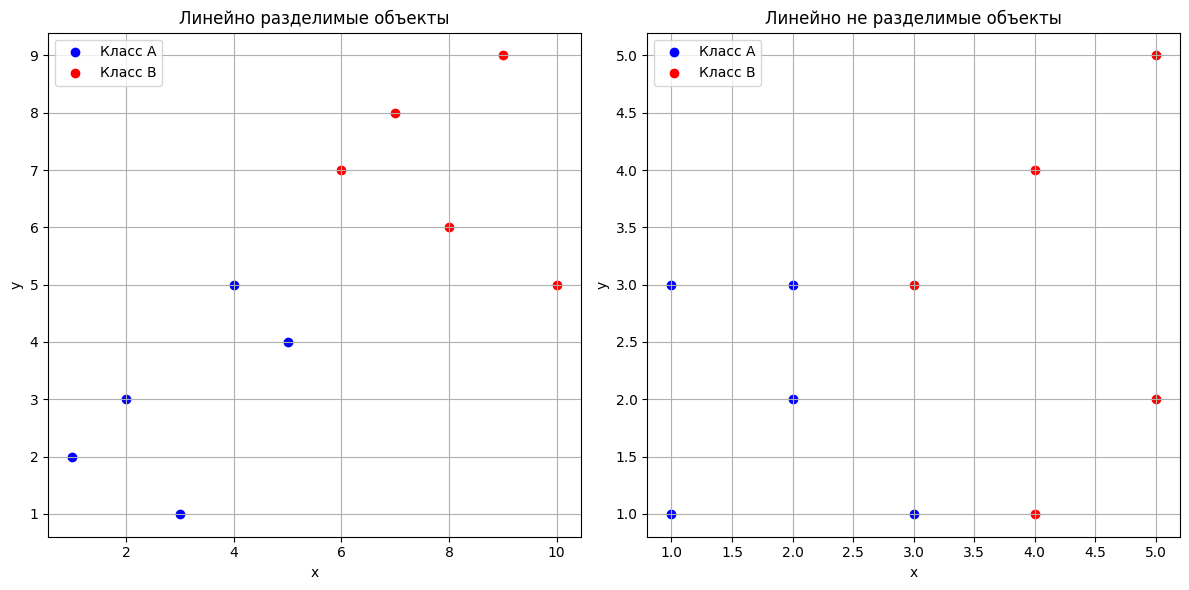

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Линейно разделимое пространство
axs[0].scatter(class_a_linear[:, 0], class_a_linear[:, 1], color='blue', label='Класс A')
axs[0].scatter(class_b_linear[:, 0], class_b_linear[:, 1], color='red', label='Класс B')
axs[0].set_title('Линейно разделимые объекты')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

# Линейно не разделимое пространство
axs[1].scatter(class_a_nonlinear[:, 0], class_a_nonlinear[:, 1], color='blue', label='Класс A')
axs[1].scatter(class_b_nonlinear[:, 0], class_b_nonlinear[:, 1], color='red', label='Класс B')
axs[1].set_title('Линейно не разделимые объекты')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [75]:
def step(x):
  return np.where(x>=0.5, 1, 0)

def delta_rule(x, y, learning_rate = 0.1, epochs = 100):
  w = np.random.rand(x.shape[1])
  w_history = []

  for epoch in range(epochs):
    output = step(np.dot(x, w))
    error = y - output
    w += learning_rate * np.dot(x.T, error)
    w_history.append(w.copy())

  return w, w_history

In [76]:
x_linear = np.vstack((class_a_linear, class_b_linear))
y_linear = np.array([0] * 5 + [1] * 5)

x_nonlinear = np.vstack((class_a_nonlinear, class_b_nonlinear))
y_nonlinear = np.array([0] * 5 + [1] * 5)

w_linear, w_history_linear = delta_rule(x_linear, y_linear, learning_rate = 0.1, epochs = 50)
w_nonlinear, w_history_nonlinear = delta_rule(x_nonlinear, y_nonlinear, learning_rate=0.1, epochs=50)

w_history_linear = np.array(w_history_linear)
w_history_nonlinear = np.array(w_history_nonlinear)

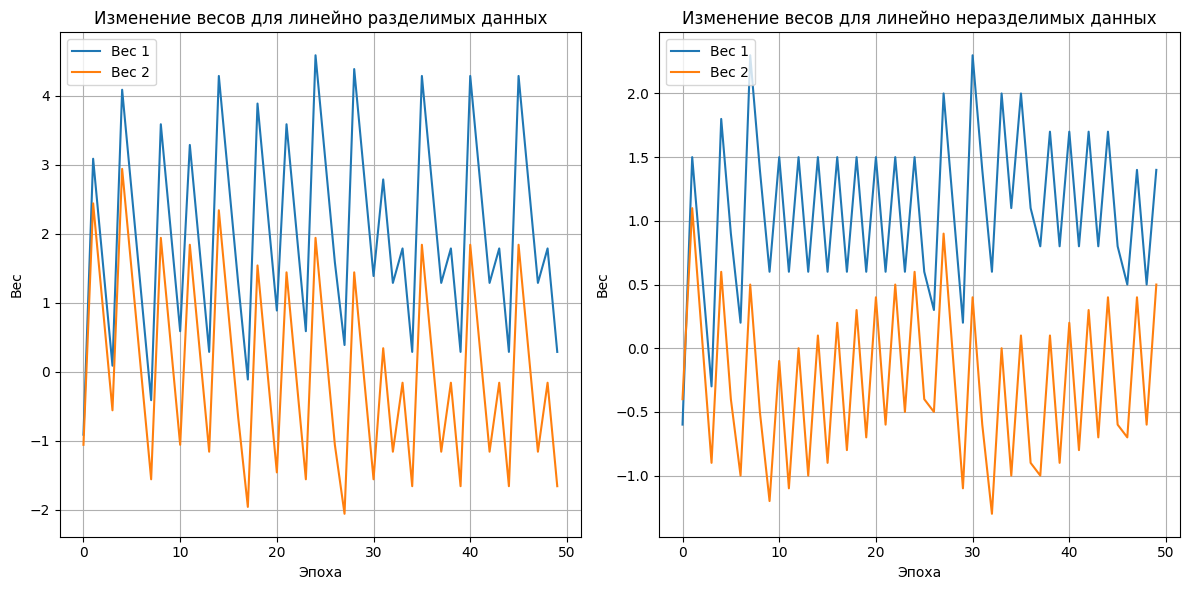

Конечные веса для линейно разделимых данных: [ 0.2852359  -1.66138982]
Конечные веса для линейно неразделимых данных: [1.40011603 0.4996874 ]


In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_history_linear)
plt.title('Изменение весов для линейно разделимых данных')
plt.xlabel('Эпоха')
plt.ylabel('Вес')
plt.legend(['Вес 1', 'Вес 2'], loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w_history_nonlinear)
plt.title('Изменение весов для линейно неразделимых данных')
plt.xlabel('Эпоха')
plt.ylabel('Вес')
plt.legend(['Вес 1', 'Вес 2'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Конечные веса для линейно разделимых данных:", w_linear)
print("Конечные веса для линейно неразделимых данных:", w_nonlinear)

#Pro

1. Сделайте нелинейный пример из Light и оцените изменение весов

2. Постройте функцию 3-х бинарных переменных и задайте случайные значения выхода (0 или 1)

3. Попробуйте построить сеть из нейронов МакКалока-Питтса, которая представит эту функцию (Например, разделите финальную функцию на более простые, которые может представить нейрон и скомбинируйте из них результат или постройте все возможные комбинации и взвесьте их по w). Попробуйте использовать Дельта-правило для настройки модели.

4. Оцените результаты построения модели (посчитайте ошибки).

In [78]:
X = np.array([[x1, x2, x3] for x1 in [0, 1] for x2 in [0, 1] for x3 in [0, 1]])

def XOR_function(x):
    return (x[0] ^ x[1]) ^ x[2]

y = np.array([XOR_function(x) for x in X])
print("Входные данные:\n", X)
print("Выходные данные:\n", y)

Входные данные:
 [[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Выходные данные:
 [0 1 1 0 1 0 0 1]


In [79]:
class MCPNeuron:
    def __init__(self, n_inputs):
        self.weights = np.random.rand(n_inputs)
        self.threshold = np.random.rand()
        self.learning_rate = 0.1

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)
        return 1 if weighted_sum >= self.threshold else 0

    def train(self, X, y, epochs):
        for _ in range(epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                self.weights += self.learning_rate * error * X[i]
                self.threshold -= self.learning_rate * error

neuron = MCPNeuron(n_inputs=3)
neuron.train(X, y, epochs=100)

predictions = np.array([neuron.predict(x) for x in X])
print("Предсказания нейрона:\n", predictions)

errors = y - predictions
print("Ошибки:\n", errors)
print("Количество ошибок:", np.sum(errors != 0))

Предсказания нейрона:
 [0 0 1 1 1 1 1 1]
Ошибки:
 [ 0  1  0 -1  0 -1 -1  0]
Количество ошибок: 4


In [80]:
accuracy = np.mean(predictions == y)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 50.00%
